In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (50,6)

import librosa
from librosa.filters import mel as librosa_mel_fn
from librosa.display import waveshow

In [9]:
wave, sr = librosa.load("../input/latika.flac", duration=90)
wave.shape, sr

((1984500,), 22050)

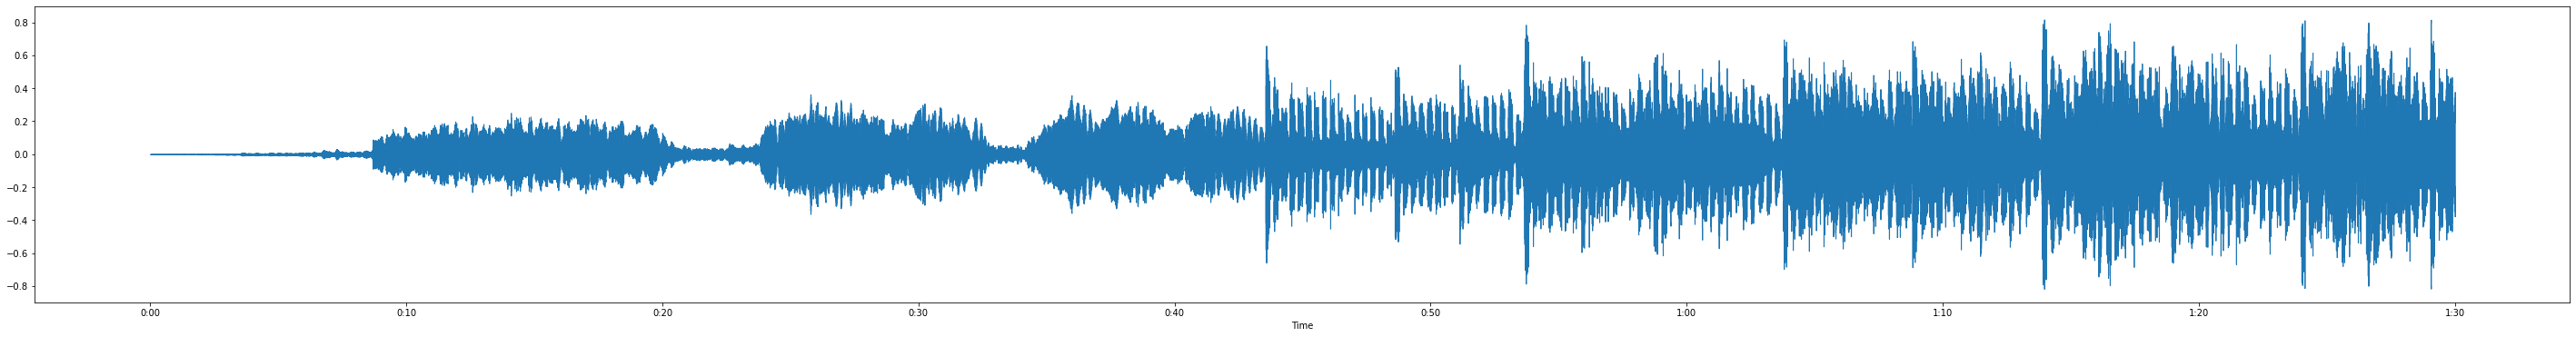

In [10]:
waveshow(wave)

In [11]:
tempo, beat = librosa.beat.beat_track(wave, sr=sr)

/tmp/ipykernel_16247/1863405006.py:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.32185787 0.33273706 0.37763125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beat = librosa.beat.beat_track(wave, sr=sr)


In [24]:
librosa.beat.beat_track?

/tmp/ipykernel_16247/1504565221.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.32185787 0.33273706 0.37763125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beats = librosa.beat.beat_track(y, sr=sr, tightness=10)


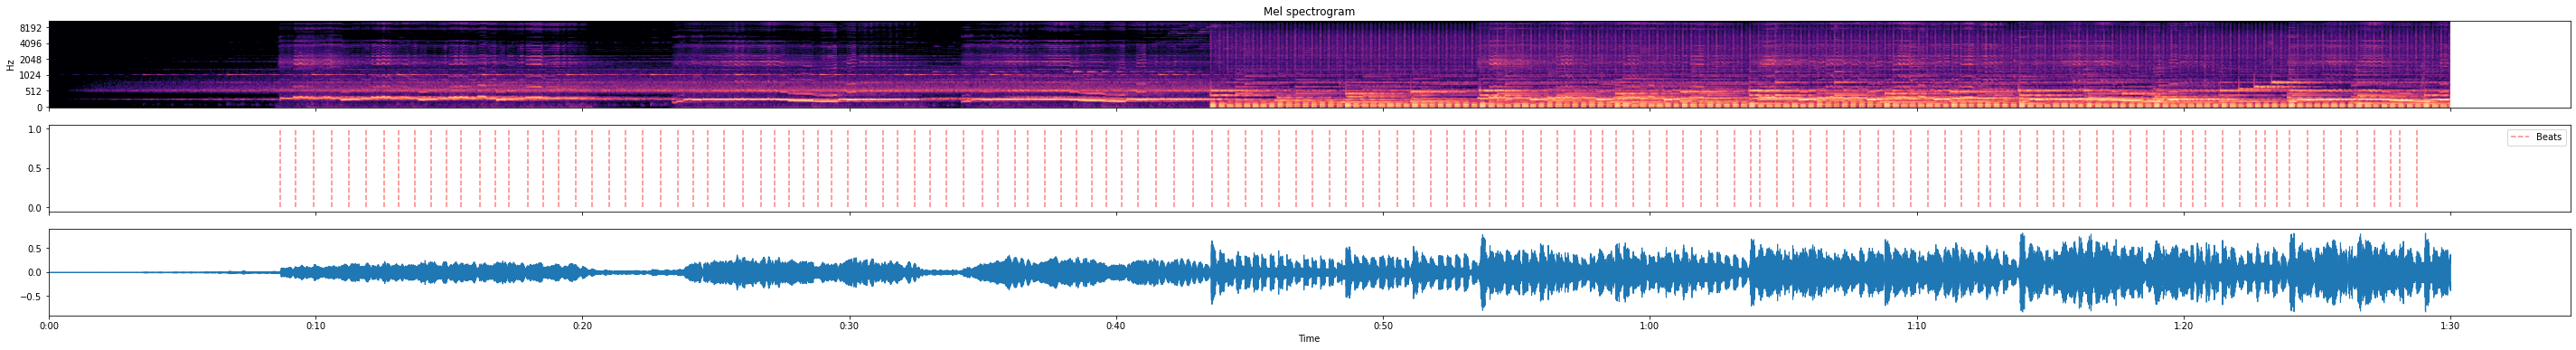

In [23]:
y = wave 

tempo, beats = librosa.beat.beat_track(y, sr=sr, tightness=15)

hop_length = 512
fig, ax = plt.subplots(nrows=3, sharex=True)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()
waveshow(wave)

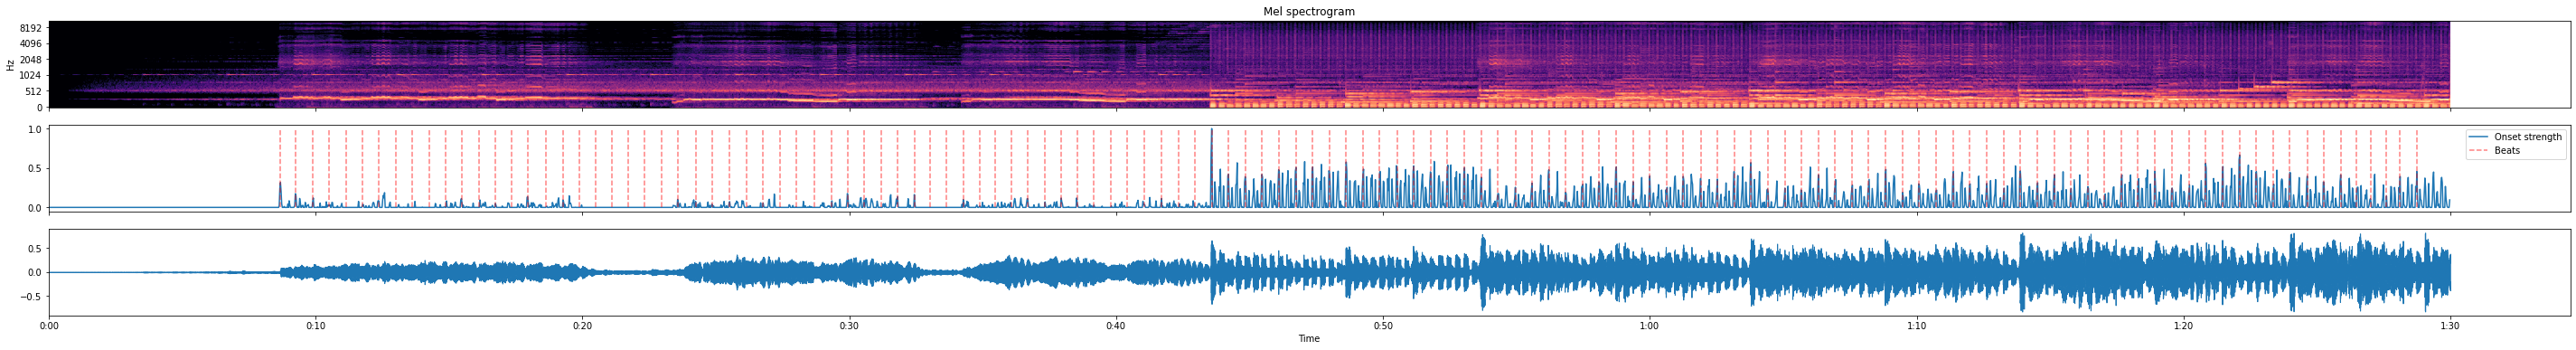

In [25]:
y = wave 

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

hop_length = 512
fig, ax = plt.subplots(nrows=3, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()
waveshow(wave)